In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , datasets , models
import pandas as pd
import numpy as np
import yfinance as yf
from tensorflow.keras.layers import SimpleRNN , Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential

In [2]:
df = pd.read_csv('NFLX.csv')


In [3]:
data = df[['Close']].values

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [4]:
# Assuming scaled_data is a 1D array of stock prices (or any time series data)
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])  # Last 60 days
    y.append(scaled_data[i])      # Corresponding target (next day's price)

X, y = np.array(X), np.array(y)


In [5]:

X = X.reshape((X.shape[0] , X.shape[1] , 1))

In [6]:
split = int(len(X) * 0.8)  # Correct way to calculate 80% split
X_train, X_test = X[:split], X[split:]  # Split the data
y_train, y_test = y[:split], y[split:]  # Split the labels


In [7]:
print(X_test.shape)

(190, 60, 1)


In [8]:

model=Sequential([
    SimpleRNN(50,input_shape=(60,1)),
    Dense(1),
])


In [9]:
model.compile(optimizer='adam' , loss='mean_squared_error' , metrics=['mae'])
history = model.fit(X_train , y_train , epochs=20 , batch_size=32, validation_data = (X_test,y_test) , verbose=1)

Epoch 1/20
24/24 [==============================] - 1s 19ms/step - loss: 0.0473 - mae: 0.1270 - val_loss: 0.0027 - val_mae: 0.0424
Epoch 2/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0021 - mae: 0.0336 - val_loss: 0.0021 - val_mae: 0.0364
Epoch 3/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0015 - mae: 0.0275 - val_loss: 0.0016 - val_mae: 0.0304
Epoch 4/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0016 - mae: 0.0291 - val_loss: 0.0015 - val_mae: 0.0297
Epoch 5/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0013 - mae: 0.0258 - val_loss: 0.0015 - val_mae: 0.0292
Epoch 6/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0012 - mae: 0.0248 - val_loss: 0.0013 - val_mae: 0.0273
Epoch 7/20
24/24 [==============================] - 0s 6ms/step - loss: 0.0013 - mae: 0.0262 - val_loss: 0.0014 - val_mae: 0.0283
Epoch 8/20
24/24 [==============================] - 0s 7ms/step - loss: 0.0011 - mae: 0.0

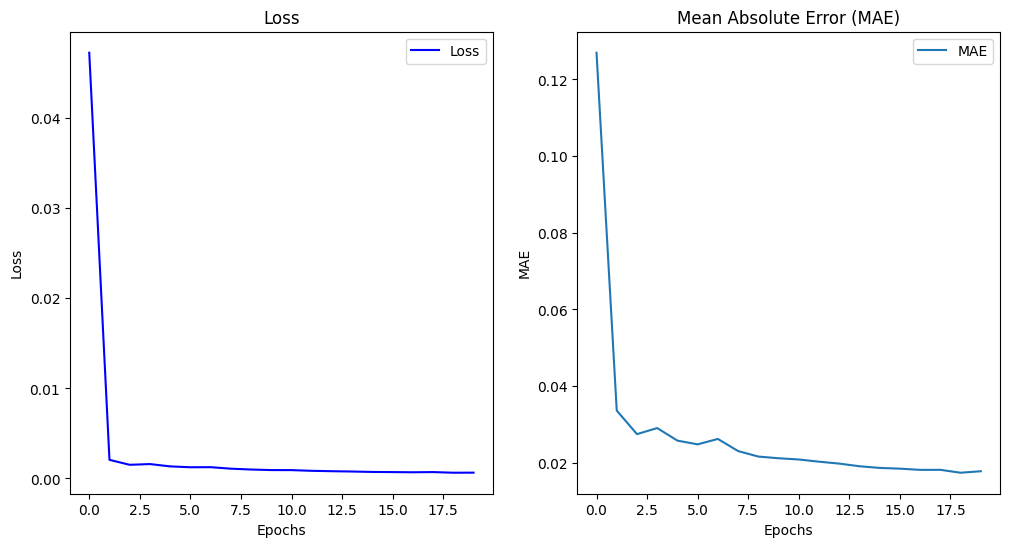

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot Loss

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss', color='blue')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot MAE (Mean Absolute Error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE')

plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()


plt.show()


6/6 [==============================] - 0s 0s/step


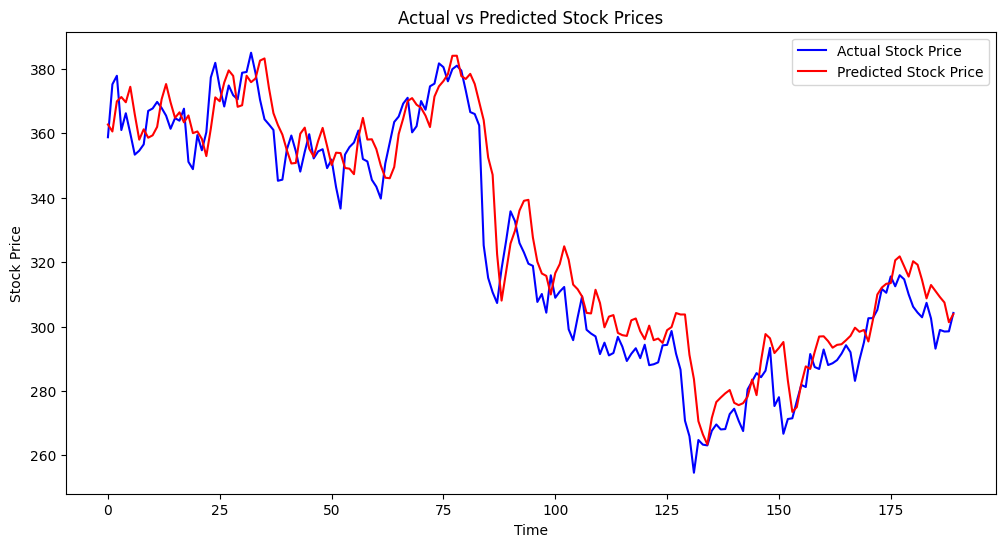

In [11]:
import matplotlib.pyplot as plt

# Assuming you have the actual and predicted prices
predicted = model.predict(X_test)  # Replace with actual predictions
real_prices = y_test  # Replace with actual test labels (real prices)

# Inverse transform if you used scaling (MinMaxScaler or similar)
predicted_prices = scaler.inverse_transform(predicted)  # Inverse scale predictions
real_prices = scaler.inverse_transform(y_test)  # Inverse scale real prices

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(real_prices, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
